In [1]:
import pandas as pd
import seaborn as sns
import pandasql as ps
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("data/data.csv")

/Users/cheryljose/Documents/Projects/TestProject/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df = df[["X", "Y", "collision_date", "collision_time", "day_of_week", "intersection", "weather_1", "location_type", "collision_severity", "number_killed", "number_injured", "party_count", "primary_coll_factor", "pcf_viol_category", "hit_and_run", "type_of_collision", "road_surface", "road_cond_1", "lighting", "control_device", "pedestrian_accident", "bicycle_accident", "motorcycle_accident", "truck_accident", "alcohol_involved", "count_ped_killed", "count_ped_injured", "count_bicyclist_killed", "count_bicyclist_injured"]]



In [30]:
df.shape

(171533, 29)

In [31]:
df.iloc[0:5]

,X,Y,collision_date,collision_time,day_of_week,intersection,weather_1,location_type,collision_severity,number_killed,...,control_device,pedestrian_accident,bicycle_accident,motorcycle_accident,truck_accident,alcohol_involved,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured
0,-118.333485,34.035515,2012-05-12T00:00:00.000Z,220,6,N,A,NaN,3,0,...,A,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,-118.401978,34.201237,2012-03-18T00:00:00.000Z,1700,7,N,B,NaN,4,0,...,D,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,-118.268378,34.113093,2014-06-15T00:00:00.000Z,1945,7,N,A,NaN,4,0,...,D,NaN,NaN,NaN,NaN,Y,0,0,0,0
3,-118.473550,34.235558,2016-07-17T00:00:00.000Z,200,7,Y,A,R,0,0,...,A,NaN,NaN,NaN,NaN,Y,0,0,0,0
4,-118.400575,34.186689,2016-07-22T00:00:00.000Z,250,5,N,A,R,0,0,...,D,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [32]:
df['location_type'] = df['location_type']

In [33]:
query = """
SELECT
X, Y, collision_date, collision_time, day_of_week, intersection, weather_1, 
IFNULL(CASE WHEN location_type = "-" THEN 'N' ELSE  location_type END,'N') AS location_type,
collision_severity, number_killed, number_injured, party_count, 
primary_coll_factor, pcf_viol_category, hit_and_run, type_of_collision, road_surface, 
road_cond_1, lighting, control_device, pedestrian_accident, bicycle_accident, 
motorcycle_accident, truck_accident, alcohol_involved, count_ped_killed, 
count_ped_injured, count_bicyclist_killed, count_bicyclist_injured
FROM df
"""

df = ps.sqldf(query, locals())

In [34]:
df.iloc[0:4]

,X,Y,collision_date,collision_time,day_of_week,intersection,weather_1,location_type,collision_severity,number_killed,...,control_device,pedestrian_accident,bicycle_accident,motorcycle_accident,truck_accident,alcohol_involved,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured
0,-118.333485,34.035515,2012-05-12T00:00:00.000Z,220,6,N,A,N,3,0,...,A,None,None,None,None,None,0,0,0,0
1,-118.401978,34.201237,2012-03-18T00:00:00.000Z,1700,7,N,B,N,4,0,...,D,None,None,None,None,None,0,0,0,0
2,-118.268378,34.113093,2014-06-15T00:00:00.000Z,1945,7,N,A,N,4,0,...,D,None,None,None,None,Y,0,0,0,0
3,-118.473550,34.235558,2016-07-17T00:00:00.000Z,200,7,Y,A,R,0,0,...,A,None,None,None,None,Y,0,0,0,0


In [35]:
df2 = ps.sqldf("""
SELECT location_type,
location_type is null
FROM df

""", locals())

In [36]:
df2.iloc[0:4]

,location_type,location_type is null
0,N,0
1,N,0
2,N,0
3,R,0


In [37]:
df['pedestrian_accident']=df['pedestrian_accident'].fillna('N')

In [38]:
## print (df['pedestrian_accident'])

In [39]:
df['bicycle_accident']=df['bicycle_accident'].fillna('N')

In [40]:
df['motorcycle_accident']=df['motorcycle_accident'].fillna('N')

In [41]:
df['truck_accident']=df['truck_accident'].fillna('N')
df['alcohol_involved']=df['alcohol_involved'].fillna('N')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171533 entries, 0 to 171532
Data columns (total 29 columns):
X                          171533 non-null float64
Y                          171533 non-null float64
collision_date             171533 non-null object
collision_time             171533 non-null int64
day_of_week                171533 non-null int64
intersection               171533 non-null object
weather_1                  171533 non-null object
location_type              171533 non-null object
collision_severity         171533 non-null int64
number_killed              171533 non-null int64
number_injured             171533 non-null int64
party_count                171533 non-null int64
primary_coll_factor        171533 non-null object
pcf_viol_category          171533 non-null object
hit_and_run                171533 non-null object
type_of_collision          171533 non-null object
road_surface               171533 non-null object
road_cond_1                171533 non-null 

In [43]:
df = df.drop_duplicates()

In [44]:
df.shape

(171522, 29)

In [45]:
df.describe()

,X,Y,collision_time,day_of_week,collision_severity,number_killed,number_injured,party_count,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured
count,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000,171522.000000
mean,-116.976252,33.681527,1361.205326,4.015345,2.196249,0.005743,0.904578,2.112703,0.002559,0.082951,0.000396,0.062173
std,12.728680,3.666561,607.723616,1.967924,1.800329,0.079547,1.002516,0.645196,0.051441,0.297530,0.019907,0.242866
min,-118.671096,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-118.438702,34.016538,925.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.331052,34.062696,1435.000000,4.000000,3.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.278332,34.172226,1830.000000,6.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,34.391670,2500.000000,7.000000,4.000000,3.000000,39.000000,15.000000,2.000000,14.000000,1.000000,3.000000


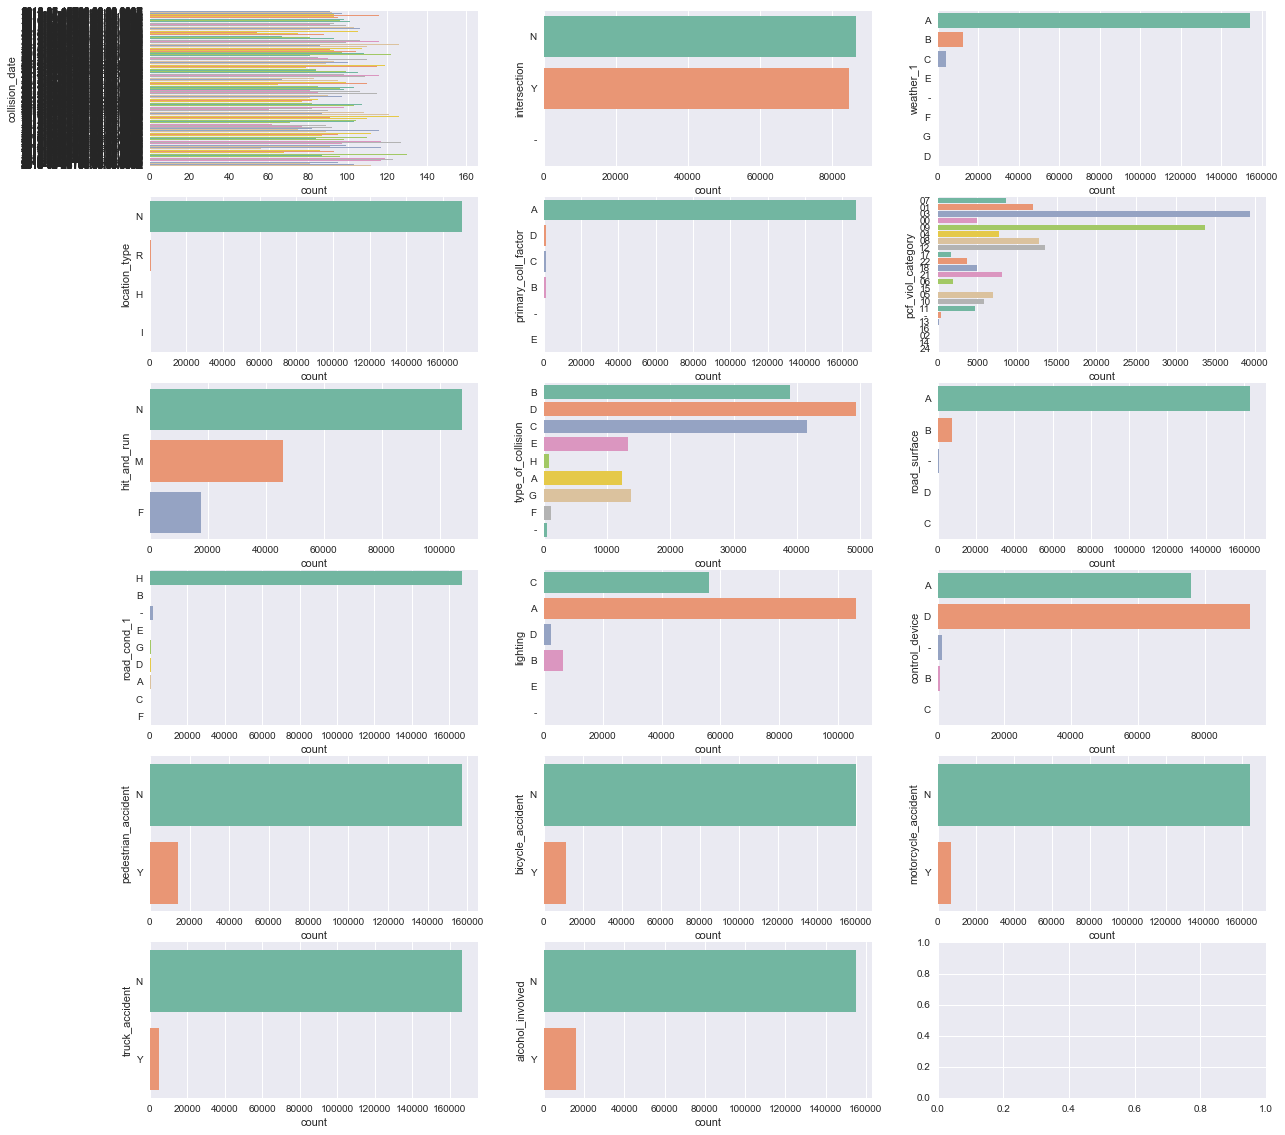

In [47]:
category_columns = []
i=0
for x in df.dtypes:
    if x == "object":
        category_columns.append(df.columns[i])
    i+=1
import math
COLUMNS = 3
plot_rows = math.ceil(len(category_columns)/COLUMNS)
fig, axs = plt.subplots(plot_rows,COLUMNS,figsize=(60/COLUMNS,60/COLUMNS))
col, row = 0, 0
for category in category_columns:    
    sns.countplot(y=category, data=df, palette="Set2",ax=axs[row][col])
    col += 1
    if col == COLUMNS:
        row += 1
        col = 0

In [17]:
sns.plot(df["X"],["Y"])

AttributeError: module 'seaborn' has no attribute 'plot'